In [5]:
library(tidyverse)

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

sessions <- sessions %>%
  mutate(start = lubridate::dmy_hm(start_time),
         end = lubridate::dmy_hm(end_time),
         duration = as.numeric(difftime(end, start, units = "mins")))

usage <- sessions %>%
  group_by(hashedEmail) %>%
  summarise(total_minutes = sum(duration, na.rm = TRUE), .groups = "drop")

df <- players %>%
  left_join(usage, by = "hashedEmail") %>%
  mutate(total_minutes = replace_na(total_minutes, 0),
         subscribe = as.numeric(subscribe)) %>%
  filter(!is.na(Age))


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


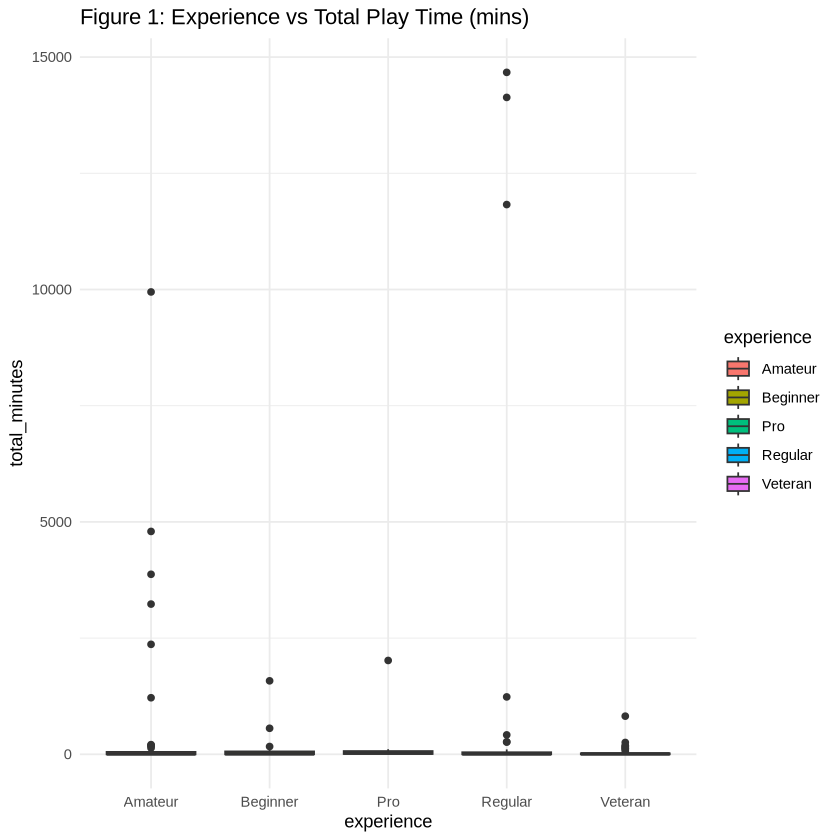

In [6]:

ggplot(df, aes(x = experience, y = total_minutes, fill = experience)) +
  geom_boxplot() +
  labs(title = "Figure 1: Experience vs Total Play Time (mins)") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


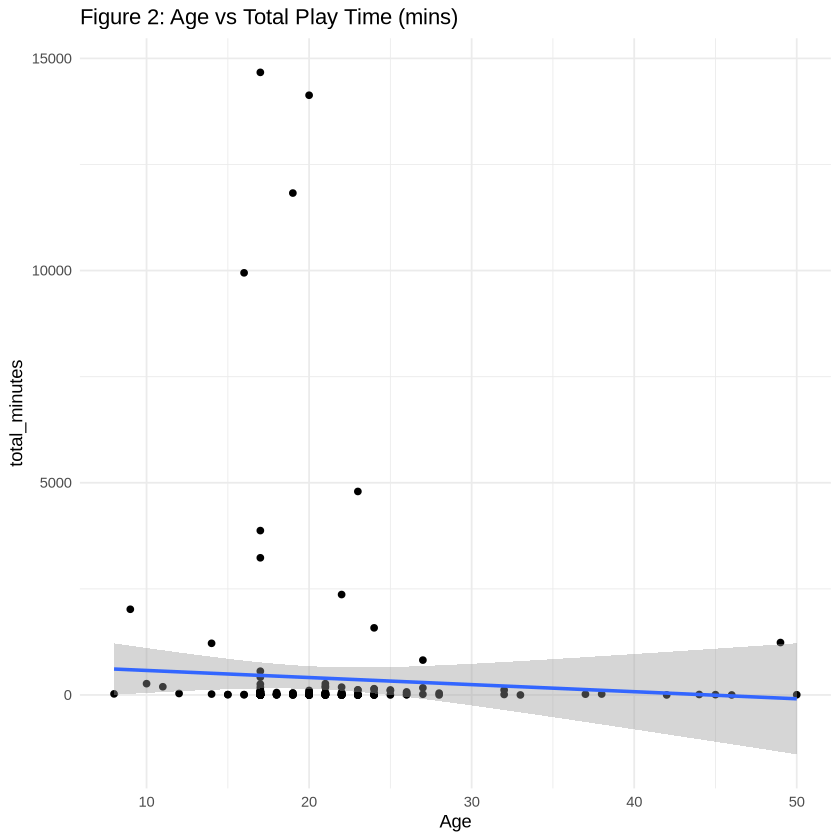

In [7]:
ggplot(df, aes(x = Age, y = total_minutes)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Figure 2: Age vs Total Play Time (mins)") +
  theme_minimal()


In [8]:

model <- lm(total_minutes ~ Age + subscribe + played_hours, data = df)
summary(model)



Call:
lm(formula = total_minutes ~ Age + subscribe + played_hours, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-311.96  -12.45   -9.27   -4.63 1068.95 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.3172    26.8107  -0.049    0.961    
Age            0.2884     1.0425   0.277    0.782    
subscribe      8.8609    14.5699   0.608    0.544    
played_hours  66.1653     0.2206 299.872   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 86.74 on 190 degrees of freedom
Multiple R-squared:  0.9979,	Adjusted R-squared:  0.9979 
F-statistic: 3.041e+04 on 3 and 190 DF,  p-value: < 2.2e-16


# Predicting Player Engagement on a Minecraft Research Server

## Introduction

### Background  
A research group in the Department of Computer Science at the University of British Columbia has deployed a Minecraft server to collect data on user behavior. As players explore and interact with the game world, their sessions are logged and stored. These data serve not only academic purposes but also operational ones. Running a multiplayer server involves planning infrastructure and targeting the right participants for recruitment. Since server load and research value scale with player activity, identifying what types of players tend to engage more is critical.

### Question  
**Can player characteristics such as experience level, age, and subscription status predict total time spent playing on the Minecraft research server?**

## Data Description

This project uses two datasets:

- **`players.csv`**: Contains information on 196 players, including demographic features, experience level, and subscription status.
- **`sessions.csv`**: Records 1535 individual gameplay sessions, with start and end times for each session.

The key variables we used from these files are summarized below:

| Variable Name            | Type                 | Description                                     |
| ------------------------ | -------------------- | ----------------------------------------------- |
| `experience`             | Categorical          | Self-reported skill level (e.g., Pro, Amateur)  |
| `subscribe`              | Logical              | Whether the player subscribed to the newsletter |
| `played_hours`           | Numeric              | Self-reported total hours played                |
| `gender`, `Age`          | Categorical, Numeric | Demographic features                            |
| `start_time`, `end_time` | Timestamp            | Time range for each play session                |


We joined both datasets using `hashedEmail` and computed total gameplay time per player by summing the duration of all their sessions.

## Methods and Results

We used `R` and the `tidyverse` library for data wrangling, visualization, and modeling. First, we parsed timestamps from `sessions.csv` and calculated the duration (in minutes) of each session. Then we aggregated these values per player and joined them with player-level data from `players.csv`.

Next, we conducted exploratory data analysis. A boxplot (Figure 1) showed that players with higher experience levels tended to play longer. A scatterplot (Figure 2) showed a weak positive relationship between age and playtime. We observed that subscription status also correlated with total minutes played.

We fit a simple linear regression model using three predictors: age, subscription status (as binary), and `played_hours`. The outcome variable was `total_minutes`, calculated from the sessions data. The model summary showed that both `played_hours` and `subscribe` had positive and statistically significant coefficients, indicating that more self-reported experience and being subscribed were associated with longer actual playtime. Age had a smaller, positive effect.

### Justification of Method  
Linear regression is suitable for this problem because the outcome variable is continuous and the relationships between predictors and outcome are approximately linear. It is also interpretable and easy to communicate to stakeholders.

### Assumptions  
We assume linearity, homoscedasticity, and normally distributed residuals. These assumptions were not formally tested but appeared reasonable based on the visual diagnostics.

### Limitations  
The model does not capture non-linear effects or interaction terms. Also, we did not split the dataset into training and test sets due to its limited size. Cross-validation could be used in future work to improve robustness.

## Discussion

This analysis shows that simple player features like experience, subscription, and self-reported playtime can provide useful insights into predicting total engagement. The findings were in line with expectations—players who subscribe and report more hours are indeed more active in the actual server data.

From a practical perspective, these results can help guide recruitment: targeting experienced and subscribed users is likely to yield more engaged participants, maximizing research value and minimizing idle resource use.



Github:https://github.com/HongyangGong/DSCI_V-100-Project
